# Lec 06. Logistic Regression

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable

import numpy as np
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
iris = datasets.load_iris()
X = iris.data
X.shape

(150, 4)

In [4]:
Y = iris.target
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
def f(x) :
    if x < 1 :
        return 0
    else :
        return 1
    
Y = np.array(list(map(f, iris.target)))   # binary classification
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

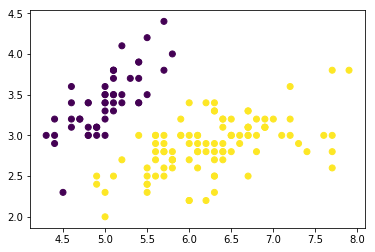

In [6]:
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.show()

## Define Model

In [7]:
x = Variable(torch.from_numpy(X)).float()
y = Variable(torch.from_numpy(Y)).float()

In [8]:
linear = nn.Linear(4, 1, bias = True)
sigmoid = nn.Sigmoid()  # Logistic function = sigmoid function

model = nn.Sequential(linear, sigmoid)   # 위 2개의 layer 연결

In [9]:
# Binary Cross Entropy
loss = nn.BCELoss()   
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
for step in range(2001):
    prob = model(x)
    cost = loss(prob, y.view(150, 1))
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 200 == 0 :
        print("Step : ",step, ", Cost : %.5f" % cost.item())

Step :  0 , Cost : 0.98170
Step :  200 , Cost : 0.24926
Step :  400 , Cost : 0.13930
Step :  600 , Cost : 0.09653
Step :  800 , Cost : 0.07410
Step :  1000 , Cost : 0.06030
Step :  1200 , Cost : 0.05096
Step :  1400 , Cost : 0.04420
Step :  1600 , Cost : 0.03908
Step :  1800 , Cost : 0.03507
Step :  2000 , Cost : 0.03183


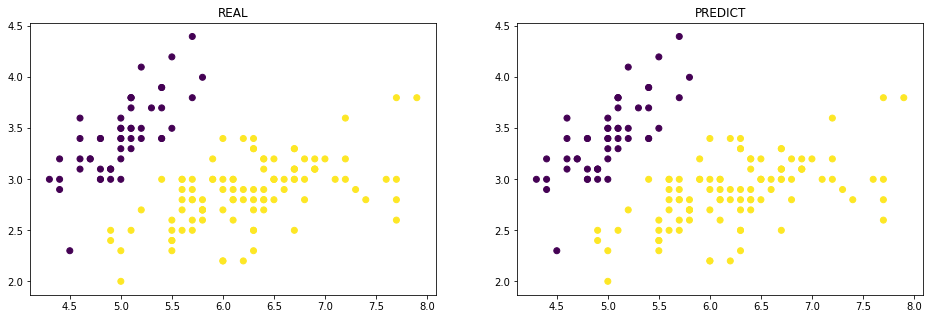

In [11]:
fig = plt.figure(figsize = (16, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

z1_plot = ax1.scatter(X[:, 0], X[:, 1], c = Y)
z2_plot = ax2.scatter(X[:, 0], X[:, 1], c = model(x).squeeze().data.numpy() > 0.5)  # probability

ax1.set_title("REAL")
ax2.set_title("PREDICT")

plt.show()

In [12]:
model(x).squeeze().data.numpy()

array([0.03393812, 0.06792127, 0.04726534, 0.0778578 , 0.03078881,
       0.03664434, 0.04858949, 0.04741902, 0.08912548, 0.06609441,
       0.02851241, 0.05995933, 0.06499956, 0.04504235, 0.0098885 ,
       0.01215793, 0.01795111, 0.03664142, 0.03513967, 0.02974207,
       0.05935014, 0.03652426, 0.01707731, 0.09155713, 0.0995139 ,
       0.09237292, 0.06549396, 0.03924758, 0.03739714, 0.07915092,
       0.08680403, 0.04876982, 0.0167052 , 0.01202142, 0.06609441,
       0.0361312 , 0.02505584, 0.06609441, 0.06657366, 0.04597921,
       0.03167289, 0.15942006, 0.0518319 , 0.06709703, 0.06460175,
       0.07534931, 0.03288708, 0.05797564, 0.02942212, 0.04520143,
       0.9687761 , 0.9658401 , 0.9828091 , 0.97713476, 0.98244584,
       0.98094934, 0.97556883, 0.90848815, 0.9758857 , 0.96144414,
       0.95935273, 0.9615808 , 0.9703428 , 0.9840921 , 0.89952135,
       0.9575175 , 0.9795012 , 0.9556766 , 0.99130696, 0.957491  ,
       0.9865019 , 0.9476488 , 0.99355525, 0.9836817 , 0.96141